## Importing the modules
- pandas for read data from csv
- matplotlib for visulazation of data
- numpy for computing operation on dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read data from csv

In [2]:
elec = pd.read_csv('data/percentage-of-schools-with-electricity-2013-2016.csv')
elec.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,82.42,96.05,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,88.86
1,Andaman & Nicobar Islands,2014-15,80.72,96.30,100.00,100.0,100.00,100.00,0.00,0.00,100.00,0.00,88.89
2,Andaman & Nicobar Islands,2015-16,82.11,97.62,100.00,0.0,100.00,100.00,0.00,0.00,100.00,0.00,90.10
3,Andhra Pradesh,2013-14,87.66,93.57,99.32,100.0,67.48,96.19,96.15,97.50,100.00,91.27,90.34
4,Andhra Pradesh,2014-15,91.08,94.70,100.00,100.0,86.11,97.60,97.11,93.55,83.33,93.21,92.76


## Now take a look on data and find some information about the all features

In [3]:
elec.shape

(110, 13)

### 1. Data has 110 row and 13 features

In [4]:
elec.dtypes

State_UT                             object
year                                 object
Primary_Only                        float64
Primary_with_U_Primary              float64
Primary_with_U_Primary_Sec_HrSec    float64
U_Primary_Only                      float64
U_Primary_With_Sec_HrSec            float64
Primary_with_U_Primary_Sec          float64
U_Primary_With_Sec                  float64
Sec_Only                            float64
Sec_with_HrSec.                     float64
HrSec_Only                          float64
All Schools                         float64
dtype: object

### 2. Two of the features are strings(object) and rest are float.

In [5]:
elec.describe()

,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,62.244545,78.447091,93.389273,70.377455,91.426091,83.350182,70.609364,53.934273,75.888182,74.648636,69.764273
std,36.828289,26.146967,17.697877,32.157024,17.448899,26.604536,35.725117,40.168495,36.671438,37.447975,30.433150
min,4.120000,11.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.960000
25%,18.547500,60.885000,95.007500,45.715000,89.847500,79.127500,59.807500,0.000000,73.182500,67.147500,38.715000
50%,73.595000,91.175000,99.200000,83.465000,97.050000,95.360000,85.710000,60.790000,95.275000,93.405000,77.795000
75%,98.605000,99.707500,100.000000,100.000000,100.000000,99.960000,97.727500,94.497500,100.000000,100.000000,98.677500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Now times for asking some good question and try to find the solution of that question through the data:
### 1.Which state has maximum percentage of school with electricity in primary level?🙂
Answer : **Chandigarh, Dadra & Nagar Haveli, Daman & Diu,Delhi, Lakshadweep, Puducherry**	These states has maximum (100%) electricity in primary schools.

In [6]:
max_val = max(elec['Primary_Only'])
elec[['State_UT','Primary_Only']].loc[elec['Primary_Only'] == max_val]

,State_UT,Primary_Only
15,Chandigarh,100.0
16,Chandigarh,100.0
17,Chandigarh,100.0
23,Dadra & Nagar Haveli,100.0
24,Daman & Diu,100.0
25,Daman & Diu,100.0
26,Daman & Diu,100.0
27,Delhi,100.0
28,Delhi,100.0
29,Delhi,100.0


### 2.Which state has minimum percentage of school with electricity in primary level? 😔
Answer: **Bihar** has minimum(4.12%) percentage of school wih electricity in Primary level.

In [7]:
min_val = min(elec['Primary_Only'])
elec[['State_UT','Primary_Only']].loc[elec['Primary_Only'] == min_val]


,State_UT,Primary_Only
12,Bihar,4.12


## Let look into the progress through the year 2014 and 2015

In [8]:
filt_14 = elec['year'] == '2014-15'
filt_15 = elec['year'] == '2015-16'
def extract_data(data):    #function to extract data and make list out of that.
    new_data = []
    for d in data:
        new_data.append(d)
    return new_data

In [9]:
elec_14 = extract_data(elec.loc[filt_14,'Primary_Only'])
elec_15 = extract_data(elec.loc[filt_15,'Primary_Only'])
states = extract_data(elec.loc[filt_15, 'State_UT'])

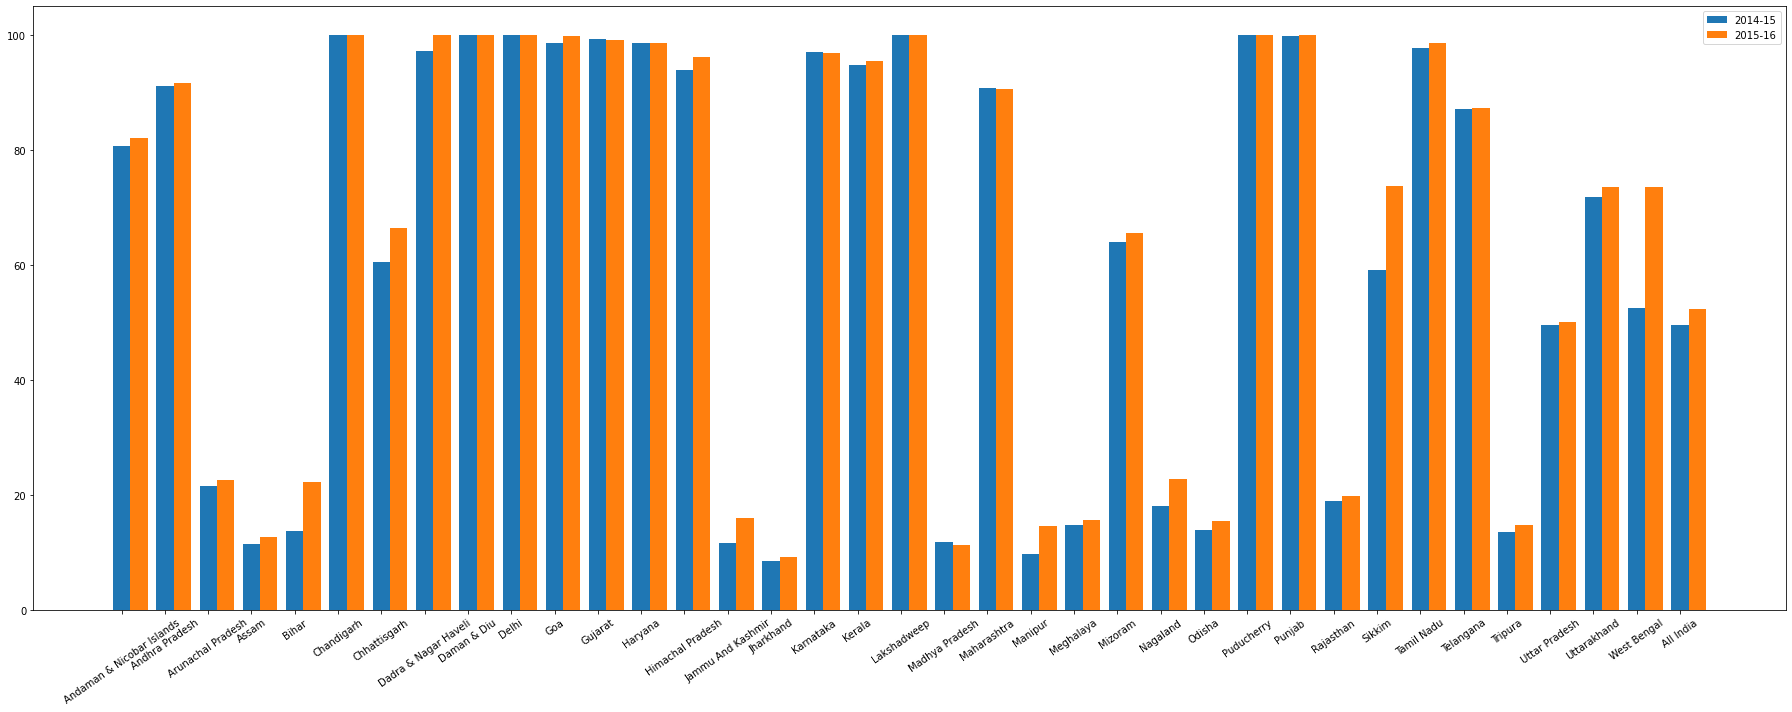

In [10]:
plt.figure(figsize=(25,10))
x_indexes = np.arange(len(states))
width = .4
plt.bar(x_indexes,elec_14,width =width,label = '2014-15')
plt.bar(x_indexes+width,elec_15,width=width,label = '2015-16')
plt.xticks(ticks=x_indexes,labels = states,rotation = 35)
plt.tight_layout()
plt.legend()